## 固定点迭代

In [1]:
import numpy as np

In [2]:
def fixed_point(f, x0, epsilon=1e-10, num_iter=200):
    g = lambda x: f(x) + x
    x = []
    x.append(x0)
    for k in range(num_iter):
        x.append(g(x[k]))  # 迭代公式
        c = abs(g(x[k+1]) - g(x[k])) / abs(x[k+1] - x[k])  # Lipschitz连续
        if c < 1:
            if abs(x[k+1] - x[k]) < epsilon:
                print("The number of iteration: ", k+1)
                break
        else:
            print("The result is divergent!")
            return None, None
    return x[-1], x

## 1. 找到$x=\cos(x)$的根

In [3]:
import matplotlib.pyplot as plt

In [4]:
f = lambda x: np.cos(x) - x

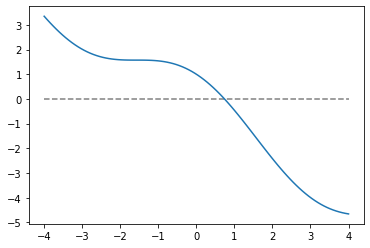

In [5]:
xn = np.linspace(-4, 4, 100)
plt.plot(xn, f(xn))
plt.hlines(0, -4, 4, linestyles='--', alpha=0.5)
plt.show()

In [6]:
root, root_lst = fixed_point(f, 0)
root

The number of iteration:  59


0.7390851332451103

### 迭代过程

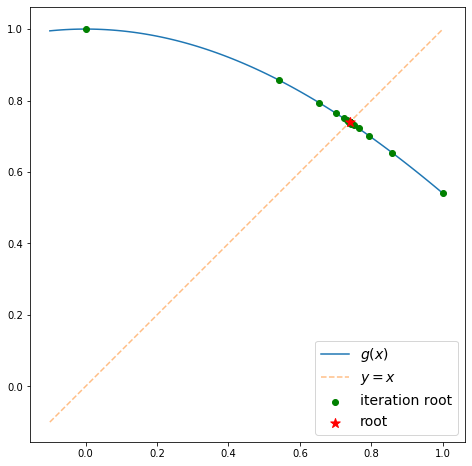

In [7]:
g = lambda x: f(x) + x

plt.figure(figsize=(10, 8))
xn = np.linspace(-0.1, 1, 100)
plt.plot(xn, g(xn), label="$g(x)$")
plt.scatter(root_lst, g(root_lst), c='g', zorder=3, label="iteration root")
plt.scatter(root, root, c='r', marker='*', zorder=3, s=100, label="root")
plt.plot(xn, xn, linestyle='--', alpha=0.5, label="$y=x$")
plt.legend(fontsize=14)
plt.axis('square')
plt.show()

### 使用 `Scipy`

In [8]:
import scipy.optimize as optimize

optimize.fixed_point(g, -100)

array(0.73908513)

## 2. 找到$e^x + e^{−x} −5 =x$的根

In [9]:
h = lambda x: np.exp(x) + np.exp(-x) - 5 - x

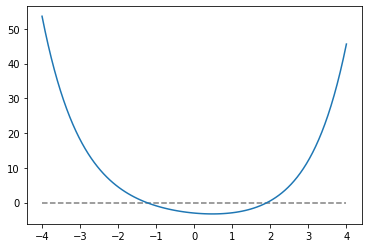

In [10]:
xn = np.linspace(-4, 4, 100)
plt.plot(xn, h(xn))
plt.hlines(0, -4, 4, linestyles='--', alpha=0.5)
plt.show()

In [11]:
root, _ = fixed_point(h, x0=-2, num_iter=10000)
root

The result is divergent!


In [12]:
root2, _ = fixed_point(h, x0=2, num_iter=10000)
root2

The result is divergent!


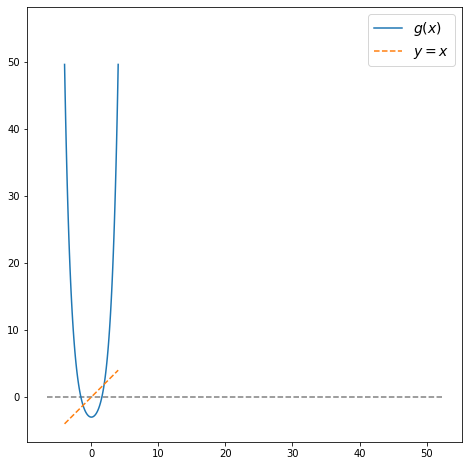

In [16]:
g = lambda x: h(x) + x

plt.figure(figsize=(8, 8))
plt.plot(xn, g(xn), label="$g(x)$")
plt.plot(xn, xn, linestyle='--', label="$y=x$")
plt.hlines(0, plt.ylim()[0], plt.ylim()[1], linestyles='--', alpha=0.5)
plt.legend(fontsize=14)
plt.axis('square')
plt.show()

### 使用`Scipy`

In [14]:
optimize.fixed_point(g, x0=3, maxiter=10000)

array(1.911574)

In [15]:
optimize.fixed_point(g, x0=-1)

array(-1.24359512)